In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import stats
from datetime import datetime
from scipy.stats import linregress

from sklearn import datasets


In [49]:
file = "Merged/merged_data.csv"

df = pd.read_csv(file)

df


,Month,GDP (million),Percent GDP,CPI,Percent CPI,Commodity Index,Seasonally adjusted unemployment (%),Owner Occ. Hsing Dbt / Inc,Interest Rates (%pa),Cash Rate (%),AUD/USD exchange rate
0,Jun-1922,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sep-1922,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dec-1922,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mar-1923,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jun-1923,NaN,NaN,2.8,2.3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
401,Sep-2022,553036.0,5.9,128.4,7.3,114.8,3.6,109.1,6.80,2.21,0.6502
402,Dec-2022,555690.0,2.7,130.8,7.8,107.9,3.5,108.8,7.55,3.01,0.6775
403,Mar-2023,NaN,NaN,NaN,NaN,106.2,NaN,NaN,NaN,3.51,0.6712
404,Jun-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.columns

Index(['Month', 'GDP (million)', 'Percent GDP', 'CPI', 'Percent CPI',
       'Commodity Index', 'Seasonally adjusted unemployment (%)',
       'Owner Occ. Hsing Dbt / Inc', 'Interest Rates (%pa)', 'Cash Rate (%)',
       'AUD/USD exchange rate'],
      dtype='object')

In [51]:
exchange_cash_df = df.loc[:, ["Month", "Commodity Index", "AUD/USD exchange rate", "Cash Rate (%)"]]
exchange_cash_df

,Month,Commodity Index,AUD/USD exchange rate,Cash Rate (%)
0,Jun-1922,NaN,NaN,NaN
1,Sep-1922,NaN,NaN,NaN
2,Dec-1922,NaN,NaN,NaN
3,Mar-1923,NaN,NaN,NaN
4,Jun-1923,NaN,NaN,NaN
...,...,...,...,...
401,Sep-2022,114.8,0.6502,2.21
402,Dec-2022,107.9,0.6775,3.01
403,Mar-2023,106.2,0.6712,3.51
404,Jun-2023,NaN,NaN,NaN


In [52]:

inter_condition_df = exchange_cash_df.loc[(exchange_cash_df["Cash Rate (%)"] >= 0) & (exchange_cash_df["Commodity Index"] >= 0) & (exchange_cash_df["AUD/USD exchange rate"] >=0)]

inter_condition_df.head()

,Month,Commodity Index,AUD/USD exchange rate,Cash Rate (%)
351,Mar-2010,52.5,0.9159,3.98
352,Jun-2010,66.4,0.8523,4.50
353,Sep-2010,65.5,0.9667,4.50
354,Dec-2010,65.0,1.0163,4.75
355,Mar-2011,70.9,1.0334,4.75


In [53]:
#calculate the mean for AUD/USD exchange rate
#population1 = inter_condition_df[inter_condition_df ["AUD/USD exchange rate"]]
# Commodity Index
hundreds_commodity_index = inter_condition_df["Commodity Index"]/100
hundreds_commodity_index.head()

351    0.525
352    0.664
353    0.655
354    0.650
355    0.709
Name: Commodity Index, dtype: float64

In [54]:
inter_condition_df["Commodity Index"] = hundreds_commodity_index
inter_condition_df.head()

C:\Users\zhusy\AppData\Local\Temp\ipykernel_16684\1198927232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter_condition_df["Commodity Index"] = hundreds_commodity_index


,Month,Commodity Index,AUD/USD exchange rate,Cash Rate (%)
351,Mar-2010,0.525,0.9159,3.98
352,Jun-2010,0.664,0.8523,4.50
353,Sep-2010,0.655,0.9667,4.50
354,Dec-2010,0.650,1.0163,4.75
355,Mar-2011,0.709,1.0334,4.75


In [55]:
exchange_rate = inter_condition_df["AUD/USD exchange rate"]
#exchange_rate

In [56]:
cash_rate = inter_condition_df["Cash Rate (%)"]

In [57]:
x_axis = inter_condition_df["Month"]
x_axis

351    Mar-2010
352    Jun-2010
353    Sep-2010
354    Dec-2010
355    Mar-2011
356    Jun-2011
357    Sep-2011
358    Dec-2011
359    Mar-2012
360    Jun-2012
361    Sep-2012
362    Dec-2012
363    Mar-2013
364    Jun-2013
365    Sep-2013
366    Dec-2013
367    Mar-2014
368    Jun-2014
369    Sep-2014
370    Dec-2014
371    Mar-2015
372    Jun-2015
373    Sep-2015
374    Dec-2015
375    Mar-2016
376    Jun-2016
377    Sep-2016
378    Dec-2016
379    Mar-2017
380    Jun-2017
381    Sep-2017
382    Dec-2017
383    Mar-2018
384    Jun-2018
385    Sep-2018
386    Dec-2018
387    Mar-2019
388    Jun-2019
389    Sep-2019
390    Dec-2019
391    Mar-2020
392    Jun-2020
393    Sep-2020
394    Dec-2020
395    Mar-2021
396    Jun-2021
397    Sep-2021
398    Dec-2021
399    Mar-2022
400    Jun-2022
401    Sep-2022
402    Dec-2022
403    Mar-2023
Name: Month, dtype: object

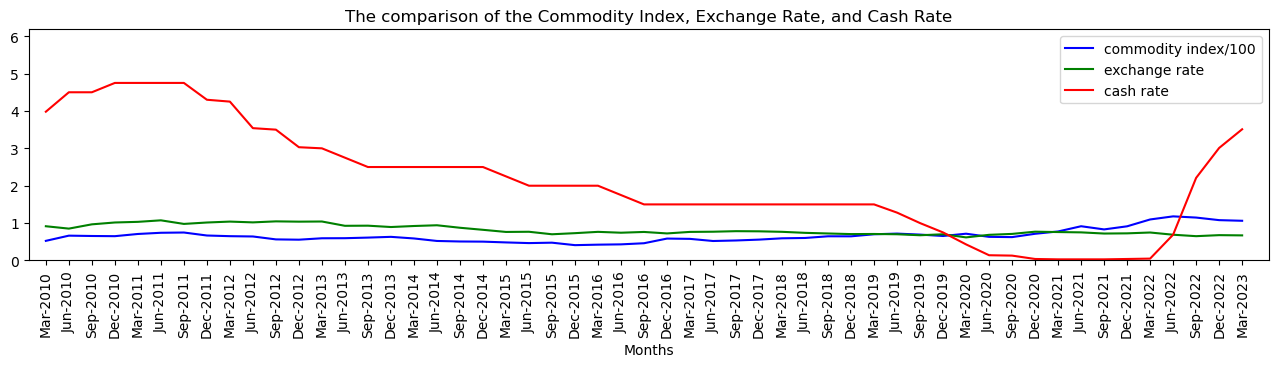

In [58]:
plt.figure(figsize = (16,3))
commodity, = plt.plot(x_axis, hundreds_commodity_index, color = "blue", label = "commodity index/100")
exchange, = plt.plot(x_axis, exchange_rate, color = "green", label = "exchange rate")
cashrate, = plt.plot(x_axis, cash_rate,  color = "red", label = "cash rate")
plt.legend(loc="best")
plt.xticks(inter_condition_df["Month"], rotation="vertical")
plt.title("The comparison of the Commodity Index, Exchange Rate, and Cash Rate")
plt.xlabel("Months")
#plt.ylabel("values of commodity index/100, exchange rate and cash rate")
plt.xlim(-0.75, len(inter_condition_df["Month"])+0.15)
plt.ylim(0, max(inter_condition_df["Commodity Index"])+5)
plt.savefig("Output/The comparison of interest exchange and cash rate.png")
plt.show()


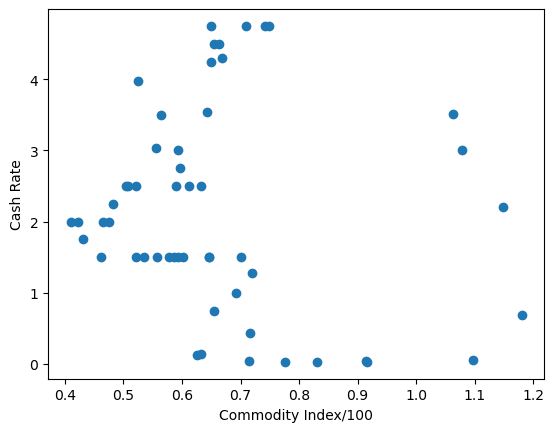

In [59]:
#Cash rate VS Commodity Index
plt.scatter(inter_condition_df.iloc[:,1], inter_condition_df.iloc[:,3])
plt.xlabel('Commodity Index/100')
plt.ylabel('Cash Rate')
plt.show()

In [60]:
#calculate correlation between Commodity and Cash rate
commodity_index = inter_condition_df.iloc[:,1]
cash_rate = inter_condition_df.iloc[:,3]
correlation = st.pearsonr(commodity_index,cash_rate)
print(f'The corrrelation between Commodity Index and Cash Rate is {round(correlation[0],2)}')
#The corrrelation between Commodity Index and Cash Rate is -0.15

The corrrelation between Commodity Index and Cash Rate is -0.15


The r is : -0.15325874809612433
The r-sauqred is: 0.023488243867991292


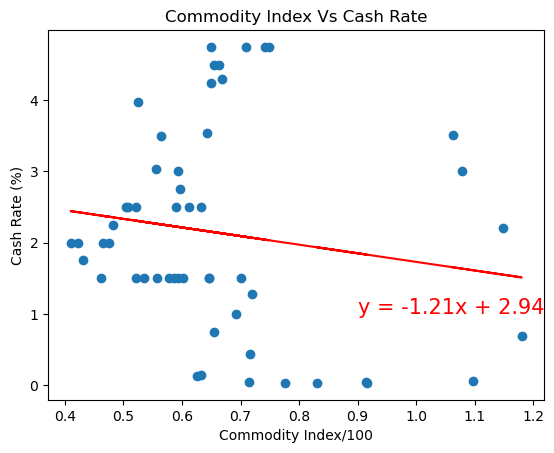

In [61]:
#Print out the r-squared value along with the plot
x_values = inter_condition_df["Commodity Index"]
y_values = inter_condition_df["Cash Rate (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Commodity Index Vs Cash Rate")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.9,1.0),fontsize = 15, color = "red")
plt.xlabel('Commodity Index/100')
plt.ylabel('Cash Rate (%)')
print(f"The r is : {rvalue}")
print(f"The r-sauqred is: {rvalue**2}")
plt.savefig("Output/Commodity Index vs Cash Rate.png")
plt.show()

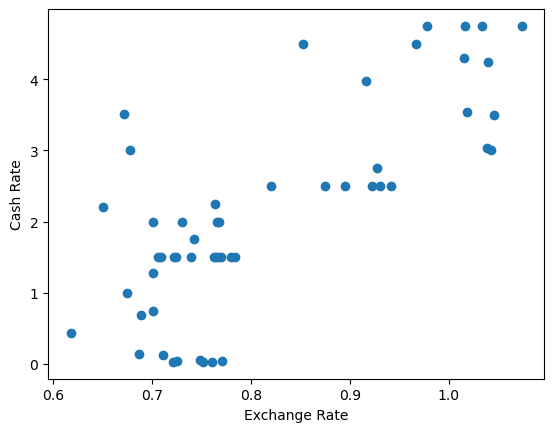

In [62]:
#exchange rate vs cash rate
plt.scatter(inter_condition_df.iloc[:,2], inter_condition_df.iloc[:,3])
plt.xlabel('Exchange Rate')
plt.ylabel('Cash Rate')
plt.show()

In [63]:
#calculate correlation between Commodity and Cash rate
exchange_rate = inter_condition_df.iloc[:,2]
cash_rate = inter_condition_df.iloc[:,3]
correlation = st.pearsonr(exchange_rate,cash_rate)
print(f'The corrrelation between Exchange Rate and Cash Rate is {round(correlation[0],2)}')
#The corrrelation between Commodity Index and Cash Rate is 0.76

The corrrelation between Exchange Rate and Cash Rate is 0.76


The r is: 0.7626355610010508
The r-sauqred is: 0.5816129989033875


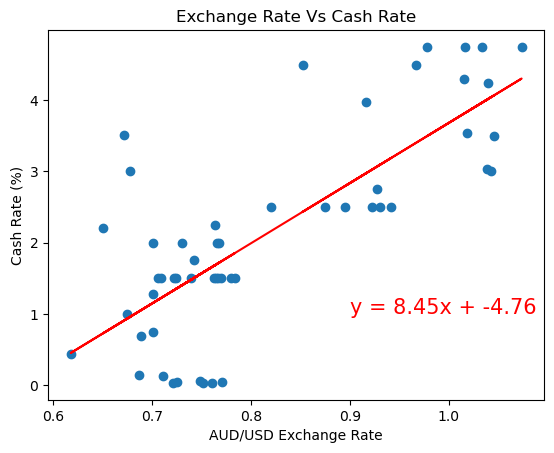

In [64]:
#Print out the r-squared value along with the plot
x_values = inter_condition_df["AUD/USD exchange rate"]
y_values = inter_condition_df["Cash Rate (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("Exchange Rate Vs Cash Rate")
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.9,1.0),fontsize = 15, color = "red")
plt.xlabel('AUD/USD Exchange Rate')
plt.ylabel('Cash Rate (%)')
print(f"The r is: {rvalue}")
print(f"The r-sauqred is: {rvalue**2}")
plt.savefig("Output/Exchange Rate vs Cash Rate.png")
plt.show()